## Lab 2 
#### Project by William Trevino, Alex Salamah, Christopher Graves, Hannah Kosinovsky

# Data Preparation Part 1

Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

In [95]:
import time
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,student_num,lea_avg_student_num,st_avg_student_num,Math I_Size,lea_total_expense_num,lea_salary_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,lea_instruct_equip_exp_pct,...,esea_status_P,Grad_project_status_Y,SPG Grade_B,SPG Grade_C,SPG Grade_D,SPG Grade_F,SPG Grade_I,EVAAS Growth Status_Met,EVAAS Growth Status_NotMet,unit_code
0,0,78.0,954.0,837.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,0,0,0,0,0,0,10303
1,1,539.0,518.0,496.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,1,0,0,0,0,0,10304
2,2,547.0,518.0,496.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,1,0,0,0,1,0,10308
3,3,800.0,768.0,665.0,26.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,0,0,1,0,0,1,10310
4,4,664.0,518.0,496.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,1,0,0,0,0,0,0,10312


## ---We imported in data we previously cleaned in Lab 1 but for consistincy sake we included the code we used for the cleaning below---

In [228]:
base = 'MSDS 7331/Dataset/EducationDataNC-master/'
file2014 = base + '2014/Machine Learning Datasets/PublicSchools2014_ML.csv'
file2015 = base + '2015/Machine Learning Datasets/PublicSchools2015_ML.csv'
file2016 = base + '2016/Machine Learning Datasets/PublicSchools2016_ML.csv'
file2017 = base + '2017/Machine Learning Datasets/PublicSchools2017_ML.csv'
df2014 = pd.read_csv(file2014)
df2015 = pd.read_csv(file2015)
df2016 = pd.read_csv(file2016)
df2017 = pd.read_csv(file2017)

df_full = pd.concat([df2014,df2015,df2016,df2017], axis=0, ignore_index=True, sort=False)

###### Since the dataset we created is the combination of the 2014-2017 pre cleaned Machine Learning data sets found in the EducationDataNC repository, it  has already been cleared of missing data, duplicate data and outliers so none are present to fix.  However, we may have created NaN values when we concatinated the 4 datasets if there was one year where the data did not have a feature found in another year. 

###### We checked this below and found that while the 4 separate datasets had 0 nulls, our combined dataset had 931697 null values. 

###### WHILE we are not using all of hte attributes in this analysis we will clean the data in case we wish to explorer these exluded features later

#### We wanted to work with data that was present across all years. Meaning, we didn't want to include features in our model that were only measured sometimes between 2014-2017. Therefore, we decided to use the method shown below in order for our approach to be more balanced. 

#### Since we are dealing with 4 years it is expected that if a feature only exists in one year it would appear in at least 25% if all years had equal

In [237]:
df_temp = df_full.loc[:, df_full.isnull().mean() < .20]

#### Next we want to remove the outliers by only keeping values within 3 standard deviations of the mean.

In [238]:
df_compare = df_temp[np.abs(df_temp-df_temp.mean()) <= (3*df_temp.std())]
df_temp.shape
df_compare.shape
df_temp.equals(df_compare)
df_temp['crime_per_c_num'].describe()

count    9722.000000
mean        0.733897
std         1.862658
min         0.000000
25%         0.000000
50%         0.250000
75%         0.830000
max        36.360000
Name: crime_per_c_num, dtype: float64

In [239]:
df_compare['crime_per_c_num'].describe()

count    9589.000000
mean        0.561148
std         0.833770
min         0.000000
25%         0.000000
50%         0.240000
75%         0.800000
max         6.250000
Name: crime_per_c_num, dtype: float64

In [240]:
df_compare.isnull().sum().sum()

62803

From the output of the isnull() function above we see that there were a lot of values outside of 6 standard deviations.

In [242]:
df_full = df_compare
df_full.shape
df_temp.shape
df.shape

(9731, 257)

# Data Preparation Part 2	

Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [227]:
df.describe()
df['total_perpupil_num'] = df['lea_federal_perpupil_num'] + df['lea_local_perpupil_num'] + df['lea_state_perpupil_num']
df['sat_above_average'] = np.where(df['lea_sat_avg_score_num'] > 1060, 1, 0)
df['total_perpupil_num'].describe()

count     9731.000000
mean      8992.041761
std       1023.850284
min       7282.190000
25%       8362.900000
50%       8779.340000
75%       9326.890000
max      17801.850000
Name: total_perpupil_num, dtype: float64

#### Our variables:

student_num - Number of students at school level - **float64 ranging from 1 to 2974**


crime_per_c_num - Number of crimes or acts of violence per 100 students at School level - **float64 ranging from 0 to 1254**


advance_dgr_pct - Percent of teachers with masters or higher degree at school level - **float64 ranging from 0 to 0.81**


_1yr_tchr_trnovr_pct - One Year Teacher turnover percentage at school level - **float64 ranging from 0 to 0.82**


lea_sat_avg_score_num - Average SAT Score (Critical Reading + Math) at the LEA Level. Local education agency, LEA, is a commonly used acronym for a school district.-  **float64 ranging from 588 to 2974**


lea_federal_perpupil_num - Federal expense per pupil at school level - **float64 ranging from 588 to 2974**


lea_local_perpupil_num - Local expense per pupil at LEA level - **float64 ranging from 588 to 2974**


lea_state_perpupil_num - State expense per pupil at LEA level -  **float64 ranging from 588 to 2974**


lea_salary_expense_pct - Percent of expense spent on Salaries at LEA level - **float64  ranging from 0.55 to 0.88**


lea_supplies_expense_pct - Percent of expense spent on Supplies at LEA level - **float64  ranging from 0.03 to 0.14**


lea_ap_participation_pct - Percentage of High School Students taking an AP exam at the LEA Level - **float64 ranging from 0 to 0.44**


lea_sat_participation_pct - Percentage of High School Seniors taking the SAT at the LEA Level - **float64 ranging from 0 to 0.82**

MinorityFemalePct - Percentage of students who are a minority race and female - **float64  ranging from 0 to .99**


MinorityMalePct - - Percentage of students who are a minority race and male - **float64 ranging from 0 to 1**


lea_avg_daily_attend_pct - Average daily attendance percentage at LEA level    - **float64 ranging from 0 to 0.99**


###### New variables
total_perpupil_num - a combined field of federal, state, and local per pupil funding - **float64 raning from 7282.19 to 17801.85 


sat_above_average - 0/1 boolean value of if the SAT is above the 1060 US average - **float65 ranging from 0 to 1**

# Modeling and Evaluation 1

Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

###### In our regression models we we will be predicting SAT scores and in our classification models we will be classifying above and below average SAT scores.

###### We expect that these models can be used to evaluate the potential of students in different schools and maybe see where curriculum can improve and where students are lacking.

###### Classification model: We chose accuracy as the evaluation metric for our classification model.  Since we are attempting to classify the sat_above_average field, both the true positve (SAT score is above average) and the true negative (SAT score is below average) prediction rates are needed.  For this reason the (true postive + true negative) / total metric (accuracy) is most approtiate metric for this problem.

###### Regression model: We chose MSE (mean square error) as the evaluation metric for our regression tasks. We originally wanted to use MAE as it is very easy to interpret given the values are not modified in scale compared to the actuals. Given the fact that some sklearn modules perform significantly worse in execution time when using MAE over MSE, we decided to use MSE as our metric. For all calculations we recorded the MSE (mean square error) and MAE for comparision's sake later on in the evaluation.

## Modeling and Evaluation 2

Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For
example, if you are using time series data then you should be using continuous training
and testing sets across time.

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

df_foo = df.drop(columns=['lea_sat_avg_score_num', 'sat_above_average'])
X = df_foo.values
y = df['lea_sat_avg_score_num'].values #this is the subset for regression
shuffle_split_reg = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=101)
shuffle_split_reg.get_n_splits(X, y)

X = df_foo.values
y = df['sat_above_average'].values #this is the subset for classification
shuffle_split_clas = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=101)
shuffle_split_clas.get_n_splits(X, y)

for train_index, test_index in shuffle_split_clas.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index) #this is the index loop
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

###### For our model training and testing split we will be using a 10 fold cross validation with stratified split.  We had previously noted in our data set that many of our features, including our classification target feature, had very skewed distributions in values, this is why we picked the stratified split. So, to avoid the fear of one or more of our CV splits being unbalanced and thus unhelpful we opted for a split that guaranteed preservation of each sample class.   Also, we made sure to only create our CV splits once and reuse the object to avoid any unfair comparisons between our models in later sections.  The potential drawback of our 10 fold validation is that the more folds we have the longer the computation will take because of the increased number of trained moels. In addition, the performance metric, overfitting, and variance generally decrease as folds increase. After we run the models we can analyze our accuracy.

# Modeling and Evaluation 3

Create three different classification/regression models for each task (e.g.,
random forest, KNN, and SVM for task one and the same or different algorithms for
task two). Two modeling techniques must be new (but the third could be SVM or
logistic regression). Adjust parameters as appropriate to increase generalization
performance using your chosen metric. You must investigate different parameters
of the algorithms!

### Classification Models: Logistic Regression, KNN, Random Forest Classifier, Gradient Boosting

In [4]:
def eval_cv(df, model_name, metric):
    tmin = round(df.loc[df['Model Name'] == model_name][metric].min(),4)
    tmax = round(df.loc[df['Model Name'] == model_name][metric].max(),4)
    tmean = round(df.loc[df['Model Name'] == model_name][metric].mean(),4)
    tstd = round(df.loc[df['Model Name'] == model_name][metric].std(),4)
    print(metric)
    print("Min:" + str(tmin) + "\tMax:" + str(tmax) + "\tMean:" + str(tmean) + "\tStd:" + str(tstd))

In [5]:
class_stats = pd.DataFrame( columns = ['Type', 'Model Name','Paramaters','CV','Accuracy', 'Execution Time', 'True Positive', 'False Positive', 'False Negative', 'True Negative', 'Precision', 'Recall', 'Model'])

In [6]:
from sklearn.metrics import accuracy_score

def run_model_class(shuffle_split, model_name, model_para, model):
    count = 1
    for train_index, test_index in shuffle_split_clas.split(X, y): 
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        start = time.time()
        model.fit(X_train,y_train)  
        y_hat = model.predict(X_test) 

        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
        #print("accuracy", acc )
        #print("confusion matrix\n",conf)
        class_stats.loc[len(class_stats)] =  ['classification', model_name, model_para, count, acc, round(time.time() - start,4), conf[0,0], conf[0,1], conf[1,0], conf[1,1], conf[0,0] / ( conf[0,0] + conf[0,1] ), conf[0,0] / ( conf[0,0] + conf[1,0]), model]
        count = count + 1
    avg_acc = round(class_stats.loc[(class_stats['Model Name'] == model_name) & (class_stats['Paramaters'] == model_para)]['Accuracy'].mean(),4)
    avg_ex = round(class_stats.loc[(class_stats['Model Name'] == model_name) & (class_stats['Paramaters'] == model_para)]['Execution Time'].mean(),4)
    avg_tp = round(class_stats.loc[(class_stats['Model Name'] == model_name) & (class_stats['Paramaters'] == model_para)]['True Positive'].mean(),4)
    avg_fp = round(class_stats.loc[(class_stats['Model Name'] == model_name) & (class_stats['Paramaters'] == model_para)]['False Positive'].mean(),4)
    avg_fn = round(class_stats.loc[(class_stats['Model Name'] == model_name) & (class_stats['Paramaters'] == model_para)]['False Negative'].mean(),4)
    avg_tn = round(class_stats.loc[(class_stats['Model Name'] == model_name) & (class_stats['Paramaters'] == model_para)]['True Negative'].mean(),4)
    avg_p = round(class_stats.loc[(class_stats['Model Name'] == model_name) & (class_stats['Paramaters'] == model_para)]['Precision'].mean(),4)
    avg_r = round(class_stats.loc[(class_stats['Model Name'] == model_name) & (class_stats['Paramaters'] == model_para)]['Recall'].mean(),4)
    class_stats.loc[len(class_stats)] =  ['classification', model_name, model_para, 'avg', avg_acc, avg_ex, avg_tp, avg_fp, avg_fn, avg_tn, avg_p, avg_r, None]
    print(model_name + " " + model_para)
#    eval_cv(class_stats, model_name, 'Accuracy')
#   eval_cv(class_stats, model_name, 'Execution Time')

###### The following three blocks of code are setup functions needed to more easily train each model.  The first function eval_cv is used to get basic statistics out of a feature on a give model accross all of the CV splits.  The second line initiates a data frame for holding all model related information including the model itself.  The third block run_model_class function is a wrapper function that runs each CV for a given model, takes all evaluation metrics and creates an average performance score for each model based on the average CV performance that is also stored in the dataframe for evaluation.

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

model_name = 'Logistic'
for C in range(1, 11, 1):
    model_para = 'L1 C=' + str(float(C/10)) + ' fit_intercept=True'
    lr_clf = LogisticRegression(n_jobs=1, random_state=101, penalty='l1', C=float(C/10), class_weight=None, solver='liblinear', fit_intercept=True) 
    run_model_class(shuffle_split_clas, model_name, model_para, lr_clf )
    model_para = 'L2 C=' + str(float(C/10)) + ' fit_intercept=True'
    lr_clf = LogisticRegression(n_jobs=1, random_state=101, penalty='l2', C=float(C/10), class_weight=None, solver='liblinear', fit_intercept=True) 
    run_model_class(shuffle_split_clas, model_name, model_para, lr_clf )
    model_para = 'L1 C=' + str(float(C/10)) + ' fit_intercept=False'
    lr_clf = LogisticRegression(n_jobs=1, random_state=101, penalty='l1', C=float(C/10), class_weight=None, solver='liblinear', fit_intercept=False) 
    run_model_class(shuffle_split_clas, model_name, model_para, lr_clf )
    model_para = 'L2 C=' + str(float(C/10)) + ' fit_intercept=False'
    lr_clf = LogisticRegression(n_jobs=1, random_state=101, penalty='l2', C=float(C/10), class_weight=None, solver='liblinear', fit_intercept=False)
    run_model_class(shuffle_split_clas, model_name, model_para, lr_clf )

Logistic L1 C=0.1 fit_intercept=True
Logistic L2 C=0.1 fit_intercept=True
Logistic L1 C=0.1 fit_intercept=False
Logistic L2 C=0.1 fit_intercept=False
Logistic L1 C=0.2 fit_intercept=True
Logistic L2 C=0.2 fit_intercept=True
Logistic L1 C=0.2 fit_intercept=False
Logistic L2 C=0.2 fit_intercept=False
Logistic L1 C=0.3 fit_intercept=True
Logistic L2 C=0.3 fit_intercept=True
Logistic L1 C=0.3 fit_intercept=False
Logistic L2 C=0.3 fit_intercept=False
Logistic L1 C=0.4 fit_intercept=True
Logistic L2 C=0.4 fit_intercept=True
Logistic L1 C=0.4 fit_intercept=False
Logistic L2 C=0.4 fit_intercept=False
Logistic L1 C=0.5 fit_intercept=True
Logistic L2 C=0.5 fit_intercept=True
Logistic L1 C=0.5 fit_intercept=False
Logistic L2 C=0.5 fit_intercept=False
Logistic L1 C=0.6 fit_intercept=True
Logistic L2 C=0.6 fit_intercept=True
Logistic L1 C=0.6 fit_intercept=False
Logistic L2 C=0.6 fit_intercept=False
Logistic L1 C=0.7 fit_intercept=True
Logistic L2 C=0.7 fit_intercept=True
Logistic L1 C=0.7 fit_inte

######  Below are the preformance results for our classification model trained above sorted by our Accuracy metric.

In [8]:
class_stats.loc[(class_stats['Model Name'] == 'Logistic') & (class_stats['CV'] == 'avg')].sort_values(by=['Accuracy'], ascending=False)

,Type,Model Name,Paramaters,CV,Accuracy,Execution Time,True Positive,False Positive,False Negative,True Negative,Precision,Recall,Model
406,classification,Logistic,L1 C=1.0 fit_intercept=True,avg,0.9601,1.5609,3797,85,109.2,874.8,0.9781,0.9721,None
428,classification,Logistic,L1 C=1.0 fit_intercept=False,avg,0.9599,1.8262,3796.8,85.2,110,874,0.9781,0.9719,None
384,classification,Logistic,L1 C=0.9 fit_intercept=False,avg,0.9598,1.8347,3796.5,85.5,110.1,873.9,0.9780,0.9718,None
362,classification,Logistic,L1 C=0.9 fit_intercept=True,avg,0.9595,1.4958,3796.3,85.7,111.3,872.7,0.9779,0.9715,None
318,classification,Logistic,L1 C=0.8 fit_intercept=True,avg,0.9594,1.8464,3795.8,86.2,111.2,872.8,0.9778,0.9716,None
340,classification,Logistic,L1 C=0.8 fit_intercept=False,avg,0.9593,1.5242,3795.6,86.4,111.8,872.2,0.9777,0.9714,None
274,classification,Logistic,L1 C=0.7 fit_intercept=True,avg,0.9589,1.5738,3794.7,87.3,112.7,871.3,0.9775,0.9712,None
296,classification,Logistic,L1 C=0.7 fit_intercept=False,avg,0.9589,1.4565,3794.6,87.4,112.8,871.2,0.9775,0.9711,None
230,classification,Logistic,L1 C=0.6 fit_intercept=True,avg,0.9581,1.7293,3792.2,89.8,114.3,869.7,0.9769,0.9708,None
252,classification,Logistic,L1 C=0.6 fit_intercept=False,avg,0.9581,1.3329,3792.9,89.1,114.7,869.3,0.9770,0.9707,None


######  For our logistic regression model we focused on a few parameters: C level (.2-1.0), L1 vs L2 penalty, and whether a bias constant should be added (fit_intercept).

###### Like all models, we set a random state so the results are easy to replicate.  As for performance, L1 consistily outperformed L2 and while a bias term generally had a postive effect on accuracy, it was always a minimal bump in accuracy.  Finally, the accuracy had the best performance when the C level moves away from 0 but acts a bit sporadic and is in need of futher visualization to confirm behavior.

In [9]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model_name = 'KNN'
for K in range(1,6):
    model_para = 'Neighbors=' + str(K) + ' algorithm=ball_tree'
    knn_clf = KNeighborsClassifier(n_neighbors=K, weights='uniform', metric='euclidean', algorithm= 'ball_tree', n_jobs=-1)
    run_model_class(shuffle_split_clas, model_name, model_para, knn_clf)
    model_para = 'Neighbors=' + str(K) + ' algorithm=kd_tree'
    knn_clf = KNeighborsClassifier(n_neighbors=K, weights='uniform', metric='euclidean', algorithm='kd_tree', n_jobs=-1)
    run_model_class(shuffle_split_clas, model_name, model_para, knn_clf)
    model_para = 'Neighbors=' + str(K) + ' algorithm=brute'
    knn_clf = KNeighborsClassifier(n_neighbors=K, weights='uniform', metric='euclidean', algorithm='brute', n_jobs=-1)
    run_model_class(shuffle_split_clas, model_name, model_para, knn_clf)

KNN Neighbors=1 algorithm=ball_tree
KNN Neighbors=1 algorithm=kd_tree
KNN Neighbors=1 algorithm=brute
KNN Neighbors=2 algorithm=ball_tree
KNN Neighbors=2 algorithm=kd_tree
KNN Neighbors=2 algorithm=brute
KNN Neighbors=3 algorithm=ball_tree
KNN Neighbors=3 algorithm=kd_tree
KNN Neighbors=3 algorithm=brute
KNN Neighbors=4 algorithm=ball_tree
KNN Neighbors=4 algorithm=kd_tree
KNN Neighbors=4 algorithm=brute
KNN Neighbors=5 algorithm=ball_tree
KNN Neighbors=5 algorithm=kd_tree
KNN Neighbors=5 algorithm=brute


######  Below are the preformance results for our classification model trained above sorted by our Accuracy metric.

In [10]:
class_stats.loc[(class_stats['Model Name'] == 'KNN') & (class_stats['CV'] == 'avg')].sort_values(by=['Accuracy'], ascending=False)

,Type,Model Name,Paramaters,CV,Accuracy,Execution Time,True Positive,False Positive,False Negative,True Negative,Precision,Recall,Model
450,classification,KNN,Neighbors=1 algorithm=ball_tree,avg,0.9995,0.1456,3881.1,0.9,1.6,982.4,0.9998,0.9996,None
461,classification,KNN,Neighbors=1 algorithm=kd_tree,avg,0.9995,0.1465,3881.1,0.9,1.6,982.4,0.9998,0.9996,None
472,classification,KNN,Neighbors=1 algorithm=brute,avg,0.9995,1.2569,3881.1,0.9,1.6,982.4,0.9998,0.9996,None
483,classification,KNN,Neighbors=2 algorithm=ball_tree,avg,0.9987,0.1433,3881.4,0.6,5.5,978.5,0.9998,0.9986,None
494,classification,KNN,Neighbors=2 algorithm=kd_tree,avg,0.9987,0.1469,3881.4,0.6,5.5,978.5,0.9998,0.9986,None
505,classification,KNN,Neighbors=2 algorithm=brute,avg,0.9987,0.9589,3881.4,0.6,5.5,978.5,0.9998,0.9986,None
516,classification,KNN,Neighbors=3 algorithm=ball_tree,avg,0.9978,0.1433,3876.7,5.3,5.5,978.5,0.9986,0.9986,None
527,classification,KNN,Neighbors=3 algorithm=kd_tree,avg,0.9978,0.1467,3876.7,5.3,5.5,978.5,0.9986,0.9986,None
538,classification,KNN,Neighbors=3 algorithm=brute,avg,0.9978,0.9738,3876.7,5.3,5.5,978.5,0.9986,0.9986,None
549,classification,KNN,Neighbors=4 algorithm=ball_tree,avg,0.9953,0.1442,3878.8,3.2,19.6,964.4,0.9992,0.9950,None


###### KNN performed very well with the data set getting >99% accuracy.  This score seemed to be best with fewer neighbors and appeared to be consistent regardless of the algorithm used to compute the nearest neighbor.  The only main difference observed is that the "brute" algorithm took about 10 times longer to run than the "ball tree" or "kd tree" algorithms.  However, this algorithm is still faster than many of the algorithms we will test.  Overall, the KNN models have some of our fastest execution times we will see.

In [11]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_name = "Random Forest"
for N in range(20, 120, 20):
    for D in range(2, 12, 2):
        model_para = "estimators=" + str(N) + " max_depht=" + str(D) + " max_features=auto"
        rf_clf = RandomForestClassifier(max_features='auto' , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_class(shuffle_split_clas, model_name, model_para, rf_clf)
        model_para = "estimators=" + str(N) + " max_depht=" + str(D) + " max_features=sqrt"
        rf_clf = RandomForestClassifier(max_features='sqrt' , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_class(shuffle_split_clas, model_name, model_para, rf_clf)
        model_para = "estimators=" + str(N) + " max_depht=" + str(D) + " max_features=log2"
        rf_clf = RandomForestClassifier(max_features='log2' , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_class(shuffle_split_clas, model_name, model_para, rf_clf)
        model_para = "estimators=" + str(N) + " max_depht=" + str(D) + " max_features=None"
        rf_clf = RandomForestClassifier(max_features=None , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_class(shuffle_split_clas, model_name, model_para, rf_clf)

Random Forrest estimators=20 max_depht=2 max_features=auto
Random Forrest estimators=20 max_depht=2 max_features=sqrt
Random Forrest estimators=20 max_depht=2 max_features=log2
Random Forrest estimators=20 max_depht=2 max_features=None
Random Forrest estimators=20 max_depht=4 max_features=auto
Random Forrest estimators=20 max_depht=4 max_features=sqrt
Random Forrest estimators=20 max_depht=4 max_features=log2
Random Forrest estimators=20 max_depht=4 max_features=None
Random Forrest estimators=20 max_depht=6 max_features=auto
Random Forrest estimators=20 max_depht=6 max_features=sqrt
Random Forrest estimators=20 max_depht=6 max_features=log2
Random Forrest estimators=20 max_depht=6 max_features=None
Random Forrest estimators=20 max_depht=8 max_features=auto
Random Forrest estimators=20 max_depht=8 max_features=sqrt
Random Forrest estimators=20 max_depht=8 max_features=log2
Random Forrest estimators=20 max_depht=8 max_features=None
Random Forrest estimators=20 max_depht=10 max_features=a

######  Below are the preformance results for our classification model trained above sorted by our Accuracy metric.

In [12]:
class_stats.loc[(class_stats['Model Name'] == 'Random Forrest') & (class_stats['CV'] == 'avg')].sort_values(by=['Accuracy'], ascending=False)

,Type,Model Name,Paramaters,CV,Accuracy,Execution Time,True Positive,False Positive,False Negative,True Negative,Precision,Recall,Model
1704,classification,Random Forrest,estimators=100 max_depht=10 max_features=None,avg,0.9966,1.3083,3877.8,4.2,12.3,971.7,0.9989,0.9968,None
1484,classification,Random Forrest,estimators=80 max_depht=10 max_features=None,avg,0.9966,1.0811,3878.1,3.9,12.7,971.3,0.9990,0.9967,None
1264,classification,Random Forrest,estimators=60 max_depht=10 max_features=None,avg,0.9965,0.8580,3877.2,4.8,12.4,971.6,0.9988,0.9968,None
1044,classification,Random Forrest,estimators=40 max_depht=10 max_features=None,avg,0.9965,0.6629,3877.3,4.7,12.3,971.7,0.9988,0.9968,None
1440,classification,Random Forrest,estimators=80 max_depht=8 max_features=None,avg,0.9957,1.0203,3875.4,6.6,14.2,969.8,0.9983,0.9964,None
824,classification,Random Forrest,estimators=20 max_depht=10 max_features=None,avg,0.9957,0.4442,3875.1,6.9,13.8,970.2,0.9982,0.9965,None
1660,classification,Random Forrest,estimators=100 max_depht=8 max_features=None,avg,0.9956,1.2456,3874.9,7.1,14.5,969.5,0.9982,0.9963,None
1220,classification,Random Forrest,estimators=60 max_depht=8 max_features=None,avg,0.9955,0.8213,3874.6,7.4,14.6,969.4,0.9981,0.9963,None
1000,classification,Random Forrest,estimators=40 max_depht=8 max_features=None,avg,0.9954,0.6609,3874.3,7.7,14.5,969.5,0.9980,0.9963,None
780,classification,Random Forrest,estimators=20 max_depht=8 max_features=None,avg,0.9949,0.4351,3873.2,8.8,15.9,968.1,0.9977,0.9959,None


###### Random Forest also has >99% performance like KNN but appeared to do so with a longer runtime.  Both of these will be compared in more detail in the evaluation and visualizaton sections.  For this model we focused on many parameters.  The "max_feature" parameter seemed to have the largest effect as almost all of the top performers had the "max_features=None" feature restriction.  After that the "sqrt" and "auto" parameter values appear to have the second largest effect (because in random forest classifiers they are the same) with the "log2"  parameter value in a distant last place. The next most important parameter is "max_depth" as the top 3 performers share the same "max_depth" (which was the highest "max_depth" evaluated). However, this makes us cautious of the possibility of over fitting our model with these deeper trees and ending up with a less useful and less generalized model.  The behavior as estimators increase shows a overall performance growth with little worry about causing over fitting but it appears to come with a execution time increase

###### Please note we had a typo of "Forrest" instead of "Forest" in our model name variable and did not have time to rerun the training models to update the name

In [13]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model_name = "Gradient Boosting"
for N in range(20, 120, 20):
    for D in range(2, 12, 2):
        model_para = "estimators=" + str(N) + " max_depht=" + str(D) + " max_features=auto"
        gb_clf = GradientBoostingClassifier(max_features='auto' , n_estimators=N, max_depth=D, random_state=101)
        run_model_class(shuffle_split_clas, model_name, model_para, gb_clf)
        model_para = "estimators=" + str(N) + " max_depht=" + str(D) + " max_features=sqrt"
        gb_clf = GradientBoostingClassifier(max_features='sqrt' , n_estimators=N, max_depth=D, random_state=101)
        run_model_class(shuffle_split_clas, model_name, model_para, gb_clf)
        model_para = "estimators=" + str(N) + " max_depht=" + str(D) + " max_features=log2"
        gb_clf = GradientBoostingClassifier(max_features='log2' , n_estimators=N, max_depth=D, random_state=101)
        run_model_class(shuffle_split_clas, model_name, model_para, gb_clf)
        model_para = "estimators=" + str(N) + " max_depht=" + str(D) + " max_features=None"
        gb_clf = GradientBoostingClassifier(max_features=None , n_estimators=N, max_depth=D, random_state=101)
        run_model_class(shuffle_split_clas, model_name, model_para, gb_clf)

Gradient Boosting estimators=20 max_depht=2 max_features=auto
Gradient Boosting estimators=20 max_depht=2 max_features=sqrt
Gradient Boosting estimators=20 max_depht=2 max_features=log2
Gradient Boosting estimators=20 max_depht=2 max_features=None
Gradient Boosting estimators=20 max_depht=4 max_features=auto
Gradient Boosting estimators=20 max_depht=4 max_features=sqrt
Gradient Boosting estimators=20 max_depht=4 max_features=log2
Gradient Boosting estimators=20 max_depht=4 max_features=None
Gradient Boosting estimators=20 max_depht=6 max_features=auto
Gradient Boosting estimators=20 max_depht=6 max_features=sqrt
Gradient Boosting estimators=20 max_depht=6 max_features=log2
Gradient Boosting estimators=20 max_depht=6 max_features=None
Gradient Boosting estimators=20 max_depht=8 max_features=auto
Gradient Boosting estimators=20 max_depht=8 max_features=sqrt
Gradient Boosting estimators=20 max_depht=8 max_features=log2
Gradient Boosting estimators=20 max_depht=8 max_features=None
Gradient

######  Below are the preformance results for our classification model trained above sorted by our Accuracy metric.

In [14]:
class_stats.loc[(class_stats['Model Name'] == 'Gradient Boosting') & (class_stats['CV'] == 'avg')].sort_values(by=['Accuracy'], ascending=False)

,Type,Model Name,Paramaters,CV,Accuracy,Execution Time,True Positive,False Positive,False Negative,True Negative,Precision,Recall,Model
2639,classification,Gradient Boosting,estimators=100 max_depht=4 max_features=auto,avg,0.9991,5.5422,3881.6,0.4,4.2,979.8,0.9999,0.9989,None
2672,classification,Gradient Boosting,estimators=100 max_depht=4 max_features=None,avg,0.9991,5.4914,3881.6,0.4,4.2,979.8,0.9999,0.9989,None
2452,classification,Gradient Boosting,estimators=80 max_depht=4 max_features=None,avg,0.9989,4.4239,3881.4,0.6,4.8,979.2,0.9998,0.9988,None
2419,classification,Gradient Boosting,estimators=80 max_depht=4 max_features=auto,avg,0.9989,4.4829,3881.4,0.6,4.8,979.2,0.9998,0.9988,None
2199,classification,Gradient Boosting,estimators=60 max_depht=4 max_features=auto,avg,0.9983,3.3706,3881.2,0.8,7.3,976.7,0.9998,0.9981,None
2232,classification,Gradient Boosting,estimators=60 max_depht=4 max_features=None,avg,0.9983,3.3247,3881.2,0.8,7.3,976.7,0.9998,0.9981,None
2463,classification,Gradient Boosting,estimators=80 max_depht=6 max_features=auto,avg,0.9980,6.6095,3880.5,1.5,8,976,0.9996,0.9979,None
2496,classification,Gradient Boosting,estimators=80 max_depht=6 max_features=None,avg,0.9980,6.6048,3880.5,1.5,8,976,0.9996,0.9979,None
2683,classification,Gradient Boosting,estimators=100 max_depht=6 max_features=auto,avg,0.9980,7.1794,3880.4,1.6,8,976,0.9996,0.9979,None
2716,classification,Gradient Boosting,estimators=100 max_depht=6 max_features=None,avg,0.9980,7.1522,3880.4,1.6,8,976,0.9996,0.9979,None


###### Our Gradient Boosting algorithm has >99% Accuracy and, as expected, accuracy climbs with the number of estimators.  But curiously enough, a "max_depth" of 4 seems to be the sweet spot in this algorithm/data set as all of our top 5 performers share this value.  As for the "max_features" value, we notice that the "max_features=None" and "max_features=auto" settings far out-perform the "log2" setting and we might conclude that this algorithm is friendlier to large feature sets.  Finally, we looked at average execution time and found that this algorithm is by far most effected by our parameter selection (especially number of estimators and max depth) sometimes running 10 times longer.

### Regression Models: Decision Tree, Random Forest, Extra Trees

In [15]:
reg_stats = pd.DataFrame( columns = ['Type', 'Model Name','Paramaters','CV', 'Execution Time', 'MAE', 'MSE', 'Model'])

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def run_model_reg(shuffle_split, model_name, model_para, model):
    count = 1
    for train_index, test_index in shuffle_split_clas.split(X, y): 
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        start = time.time()
        model.fit(X_train,y_train)  
        y_hat = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_hat)
        mse = mean_squared_error(y_test, y_hat)  
        reg_stats.loc[len(reg_stats)] =  ['regression', model_name, model_para, count, round(time.time() - start,4), mae, mse, model]
        count = count + 1
    avg_ex = round(reg_stats.loc[(reg_stats['Model Name'] == model_name) & (reg_stats['Paramaters'] == model_para)]['Execution Time'].mean(),4)
    avg_mae = round(reg_stats.loc[(reg_stats['Model Name'] == model_name) & (reg_stats['Paramaters'] == model_para)]['MAE'].mean(),4)
    avg_mse = round(reg_stats.loc[(reg_stats['Model Name'] == model_name) & (reg_stats['Paramaters'] == model_para)]['MSE'].mean(),4)
    reg_stats.loc[len(reg_stats)] =  ['regression', model_name, model_para, 'avg', avg_ex, avg_mae, avg_mse, None]
    print(model_name + " " + model_para)
#    eval_cv(reg_stats, model_name, 'MAE')
#    eval_cv(reg_stats, model_name, 'Execution Time')

###### Like in our Classification problem, we started off with two blocks of code for setup functions needed to more easily train each model.  The first line is simply initializing a data frame for holding all model related information including the model itself.  The second block contains the run_model_reg wrapper function that runs each CV for a given model, takes all evaluation metrics and creates an average performance score for each model based on the average CV performance. This is nearly identical to the classification one but with the exception of the test statistics collected.

In [17]:
from sklearn.tree import DecisionTreeRegressor

model_name = "Decision Tree"
for D in range(2, 12, 2):
    model_para = "splitter=best max_depth=" + str(D) + " max_features=auto"
    rf_reg = DecisionTreeRegressor(max_features='auto' , splitter='best', max_depth=D, random_state=101)
    run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)
    model_para = "splitter=best max_depth=" + str(D) + " max_features=sqrt"
    rf_reg = DecisionTreeRegressor(max_features='sqrt' , splitter='best', max_depth=D, random_state=101)
    run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)
    model_para = "splitter=best max_depth=" + str(D) + " max_features=log2"
    rf_reg = DecisionTreeRegressor(max_features='log2' , splitter='best', max_depth=D, random_state=101)
    run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)
    model_para = "splitter=best max_depth=" + str(D) + " max_features=None"
    rf_reg = DecisionTreeRegressor(max_features=None , splitter='best', max_depth=D, random_state=101)
    run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)
    model_para = "splitter=random max_depth=" + str(D) + " max_features=auto"
    rf_reg = DecisionTreeRegressor(max_features='auto' , splitter='random', max_depth=D, random_state=101)
    run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)
    model_para = "splitter=random max_depth=" + str(D) + " max_features=sqrt"
    rf_reg = DecisionTreeRegressor(max_features='sqrt' , splitter='random', max_depth=D, random_state=101)
    run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)
    model_para = "splitter=random max_depth=" + str(D) + " max_features=log2"
    rf_reg = DecisionTreeRegressor(max_features='log2' , splitter='random', max_depth=D, random_state=101)
    run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)
    model_para = "splitter=random max_depth=" + str(D) + " max_features=None"
    rf_reg = DecisionTreeRegressor(max_features=None , splitter='random', max_depth=D, random_state=101)
    run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)

Decision Tree splitter=best max_depht=2 max_features=auto
Decision Tree splitter=best max_depht=2 max_features=sqrt
Decision Tree splitter=best max_depht=2 max_features=log2
Decision Tree splitter=best max_depht=2 max_features=None
Decision Tree splitter=random max_depht=2 max_features=auto
Decision Tree splitter=random max_depht=2 max_features=sqrt
Decision Tree splitter=random max_depht=2 max_features=log2
Decision Tree splitter=random max_depht=2 max_features=None
Decision Tree splitter=best max_depht=4 max_features=auto
Decision Tree splitter=best max_depht=4 max_features=sqrt
Decision Tree splitter=best max_depht=4 max_features=log2
Decision Tree splitter=best max_depht=4 max_features=None
Decision Tree splitter=random max_depht=4 max_features=auto
Decision Tree splitter=random max_depht=4 max_features=sqrt
Decision Tree splitter=random max_depht=4 max_features=log2
Decision Tree splitter=random max_depht=4 max_features=None
Decision Tree splitter=best max_depht=6 max_features=aut

######  Below are the preformance results for our regression model trained above sorted by our MSE metric.

In [29]:
reg_stats.loc[(reg_stats['Model Name'] == 'Decision Tree') & (reg_stats['CV'] == 'avg')].sort_values(by=['MSE'], ascending=True)

,Type,Model Name,Paramaters,CV,Execution Time,MAE,MSE,Model
395,regression,Decision Tree,splitter=best max_depht=10 max_features=None,avg,0.1898,0.0065,0.0064,None
362,regression,Decision Tree,splitter=best max_depht=10 max_features=auto,avg,0.1847,0.0065,0.0064,None
307,regression,Decision Tree,splitter=best max_depht=8 max_features=None,avg,0.1817,0.0084,0.0072,None
274,regression,Decision Tree,splitter=best max_depht=8 max_features=auto,avg,0.1822,0.0084,0.0072,None
439,regression,Decision Tree,splitter=random max_depht=10 max_features=None,avg,0.0459,0.0088,0.0079,None
406,regression,Decision Tree,splitter=random max_depht=10 max_features=auto,avg,0.0455,0.0088,0.0079,None
351,regression,Decision Tree,splitter=random max_depht=8 max_features=None,avg,0.0428,0.0174,0.0113,None
318,regression,Decision Tree,splitter=random max_depht=8 max_features=auto,avg,0.0431,0.0174,0.0113,None
186,regression,Decision Tree,splitter=best max_depht=6 max_features=auto,avg,0.1715,0.0205,0.0129,None
219,regression,Decision Tree,splitter=best max_depht=6 max_features=None,avg,0.1697,0.0205,0.0129,None


######  For our Decision Tree models we can see that overall this algorithm is very fast and wins out in speed due to its simplicity.  In the case with a random split and max depth of 2 we see ~0.01 seconds and below for execution time.  As for the splitter parameter (method used for deciding the split at each node) the "best" option almost always out performs the "random" option but at the cost of about 4x execution time.  Again, like we noted in most all of our tree based alogrithms, it is very happy to have a higher depth and a larger set of features to work with.  Finally, performance on MSE is very good seeing values of  <0.01 for our top 5 and in most cases <0.1 .

In [19]:
from sklearn.ensemble import RandomForestRegressor

model_name = "Random Forest"
for N in range(20, 120, 20):
    for D in range(2, 12, 2):
        model_para = "estimators=" + str(N) + " max_depth=" + str(D) + " max_features=auto"
        rf_reg = RandomForestRegressor(max_features='auto' , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)
        model_para = "estimators=" + str(N) + " max_depth=" + str(D) + " max_features=sqrt"
        rf_reg = RandomForestRegressor(max_features='sqrt' , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)
        model_para = "estimators=" + str(N) + " max_depth=" + str(D) + " max_features=log2"
        rf_reg = RandomForestRegressor(max_features='log2' , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)
        model_para = "estimators=" + str(N) + " max_depth=" + str(D) + " max_features=None"
        rf_reg = RandomForestRegressor(max_features=None , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_reg(shuffle_split_reg, model_name, model_para, rf_reg)

Random Forest estimators=20 max_depht=2 max_features=auto
Random Forest estimators=20 max_depht=2 max_features=sqrt
Random Forest estimators=20 max_depht=2 max_features=log2
Random Forest estimators=20 max_depht=2 max_features=None
Random Forest estimators=20 max_depht=4 max_features=auto
Random Forest estimators=20 max_depht=4 max_features=sqrt
Random Forest estimators=20 max_depht=4 max_features=log2
Random Forest estimators=20 max_depht=4 max_features=None
Random Forest estimators=20 max_depht=6 max_features=auto
Random Forest estimators=20 max_depht=6 max_features=sqrt
Random Forest estimators=20 max_depht=6 max_features=log2
Random Forest estimators=20 max_depht=6 max_features=None
Random Forest estimators=20 max_depht=8 max_features=auto
Random Forest estimators=20 max_depht=8 max_features=sqrt
Random Forest estimators=20 max_depht=8 max_features=log2
Random Forest estimators=20 max_depht=8 max_features=None
Random Forest estimators=20 max_depht=10 max_features=auto
Random Forest

######  Below are the preformance results for our regression model trained above sorted by our MSE metric.

In [30]:
reg_stats.loc[(reg_stats['Model Name'] == 'Random Forest') & (reg_stats['CV'] == 'avg')].sort_values(by=['MSE'], ascending=True)

,Type,Model Name,Paramaters,CV,Execution Time,MAE,MSE,Model
1539,regression,Random Forest,estimators=100 max_depht=10 max_features=None,avg,1.1851,0.0122,0.0035,None
1506,regression,Random Forest,estimators=100 max_depht=10 max_features=auto,avg,1.1974,0.0122,0.0035,None
1286,regression,Random Forest,estimators=80 max_depht=10 max_features=auto,avg,1.0132,0.0123,0.0035,None
1319,regression,Random Forest,estimators=80 max_depht=10 max_features=None,avg,1.0129,0.0123,0.0035,None
1066,regression,Random Forest,estimators=60 max_depht=10 max_features=auto,avg,0.8093,0.0123,0.0036,None
1099,regression,Random Forest,estimators=60 max_depht=10 max_features=None,avg,0.7955,0.0123,0.0036,None
879,regression,Random Forest,estimators=40 max_depht=10 max_features=None,avg,0.6191,0.0124,0.0037,None
846,regression,Random Forest,estimators=40 max_depht=10 max_features=auto,avg,0.6376,0.0124,0.0037,None
1495,regression,Random Forest,estimators=100 max_depht=8 max_features=None,avg,1.1658,0.0135,0.0039,None
1462,regression,Random Forest,estimators=100 max_depht=8 max_features=auto,avg,1.1886,0.0135,0.0039,None


###### We return to Random Forest this time for a regression model to compare not only how it performs against a simple decision tree, but also to compare how parameters might effect the regressor differently than the classifier.  Straight away we saw better MSE scores compared to our simple decision tree with values all the way down to 0.0035. However, this comes at the cost of about 10x execution time. In our classifier we found the "max_features" had more importance and "estimators" count to be a big contributer, but here it appears that "max_depth" is the heaviest influencer of success. Even seeing the esimators drop from 100 to 20 only decreases the MSE score from 0.0035 to 0.0041 when "max_depth" is kept at 10.

In [57]:
from sklearn.ensemble import ExtraTreesRegressor

model_name = "Extra Tree"
for N in range(20, 120, 20):
    for D in range(2, 12, 2):
        model_para = "estimators=" + str(N) + " max_depth=" + str(D) + " max_features=auto"
        et_reg = ExtraTreesRegressor(max_features='auto' , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_reg(shuffle_split_reg, model_name, model_para, et_reg)
        model_para = "estimators=" + str(N) + " max_depth=" + str(D) + " max_features=sqrt"
        et_reg = ExtraTreesRegressor(max_features='sqrt' , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_reg(shuffle_split_reg, model_name, model_para, et_reg)
        model_para = "estimators=" + str(N) + " max_depth=" + str(D) + " max_features=log2"
        et_reg = ExtraTreesRegressor(max_features='log2' , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_reg(shuffle_split_reg, model_name, model_para, et_reg)
        model_para = "estimators=" + str(N) + " max_depth=" + str(D) + " max_features=None"
        et_reg = ExtraTreesRegressor(max_features=None , n_estimators=N, max_depth=D, random_state=101, n_jobs=-1)
        run_model_reg(shuffle_split_reg, model_name, model_para, et_reg)

Extra Tree estimators=20 max_depht=2 max_features=auto
Extra Tree estimators=20 max_depht=2 max_features=sqrt
Extra Tree estimators=20 max_depht=2 max_features=log2
Extra Tree estimators=20 max_depht=2 max_features=None
Extra Tree estimators=20 max_depht=4 max_features=auto
Extra Tree estimators=20 max_depht=4 max_features=sqrt
Extra Tree estimators=20 max_depht=4 max_features=log2
Extra Tree estimators=20 max_depht=4 max_features=None
Extra Tree estimators=20 max_depht=6 max_features=auto
Extra Tree estimators=20 max_depht=6 max_features=sqrt
Extra Tree estimators=20 max_depht=6 max_features=log2
Extra Tree estimators=20 max_depht=6 max_features=None
Extra Tree estimators=20 max_depht=8 max_features=auto
Extra Tree estimators=20 max_depht=8 max_features=sqrt
Extra Tree estimators=20 max_depht=8 max_features=log2
Extra Tree estimators=20 max_depht=8 max_features=None
Extra Tree estimators=20 max_depht=10 max_features=auto
Extra Tree estimators=20 max_depht=10 max_features=sqrt
Extra Tr

######  Below are the preformance results for our regression model trained above sorted by our MSE metric.

In [103]:
reg_stats.loc[(reg_stats['Model Name'] == 'Extra Tree') & (reg_stats['CV'] == 'avg')].sort_values(by=['MSE'], ascending=True)

,Type,Model Name,Paramaters,CV,Execution Time,MAE,MSE,Model
2639,regression,Extra Tree,estimators=100 max_depht=10 max_features=None,avg,0.6636,0.0128,0.0024,None
2419,regression,Extra Tree,estimators=80 max_depht=10 max_features=None,avg,0.5830,0.0127,0.0024,None
1946,regression,Extra Tree,estimators=40 max_depht=10 max_features=auto,avg,0.3340,0.0126,0.0024,None
1979,regression,Extra Tree,estimators=40 max_depht=10 max_features=None,avg,0.3328,0.0126,0.0024,None
2199,regression,Extra Tree,estimators=60 max_depht=10 max_features=None,avg,0.4430,0.0127,0.0024,None
2386,regression,Extra Tree,estimators=80 max_depht=10 max_features=auto,avg,0.5767,0.0127,0.0024,None
2606,regression,Extra Tree,estimators=100 max_depht=10 max_features=auto,avg,0.6671,0.0128,0.0024,None
2166,regression,Extra Tree,estimators=60 max_depht=10 max_features=auto,avg,0.4679,0.0127,0.0024,None
1759,regression,Extra Tree,estimators=20 max_depht=10 max_features=None,avg,0.2944,0.0126,0.0026,None
1726,regression,Extra Tree,estimators=20 max_depht=10 max_features=auto,avg,0.3144,0.0126,0.0026,None


###### For our Extra Tree models we again saw "max_depth" return as king of performance on our MSE score of  0.0024.   However, it is noteworthy that we saw this score stay the same from 100,80,60,40 estimators and only dropped slightly when estimators moved to 20.  This lead us to prefer the lower estimator since the execution time was about half or lower.   As noted with other tree algorithms, it prefers when "max_features" are not limited, but sometimes a lower parameter model may be prefered when the goal is to make the model more generalized or when collecting all of the features may be more difficult because of time or expense.

# Modeling and Evaluation 4

Analyze the results using your chosen method of evaluation. Use
visualizations of the results to bolster the analysis. Explain any visuals and analyze why
they are interesting to someone that might use this model.

In [68]:
class_stats.loc[(class_stats['CV'] == 'avg')].sort_values(by=['Accuracy'], ascending=False).head(10)

,Type,Model Name,Paramaters,CV,Accuracy,Execution Time,True Positive,False Positive,False Negative,True Negative,Precision,Recall,Model
472,classification,KNN,Neighbors=1 algorithm=brute,avg,0.9995,1.2569,3881.1,0.9,1.6,982.4,0.9998,0.9996,None
461,classification,KNN,Neighbors=1 algorithm=kd_tree,avg,0.9995,0.1465,3881.1,0.9,1.6,982.4,0.9998,0.9996,None
450,classification,KNN,Neighbors=1 algorithm=ball_tree,avg,0.9995,0.1456,3881.1,0.9,1.6,982.4,0.9998,0.9996,None
2672,classification,Gradient Boosting,estimators=100 max_depht=4 max_features=None,avg,0.9991,5.4914,3881.6,0.4,4.2,979.8,0.9999,0.9989,None
2639,classification,Gradient Boosting,estimators=100 max_depht=4 max_features=auto,avg,0.9991,5.5422,3881.6,0.4,4.2,979.8,0.9999,0.9989,None
2419,classification,Gradient Boosting,estimators=80 max_depht=4 max_features=auto,avg,0.9989,4.4829,3881.4,0.6,4.8,979.2,0.9998,0.9988,None
2452,classification,Gradient Boosting,estimators=80 max_depht=4 max_features=None,avg,0.9989,4.4239,3881.4,0.6,4.8,979.2,0.9998,0.9988,None
505,classification,KNN,Neighbors=2 algorithm=brute,avg,0.9987,0.9589,3881.4,0.6,5.5,978.5,0.9998,0.9986,None
494,classification,KNN,Neighbors=2 algorithm=kd_tree,avg,0.9987,0.1469,3881.4,0.6,5.5,978.5,0.9998,0.9986,None
483,classification,KNN,Neighbors=2 algorithm=ball_tree,avg,0.9987,0.1433,3881.4,0.6,5.5,978.5,0.9998,0.9986,None


###### We started our analysis of the classification models by looking at the top 10 models by accuracy.  Here we noted that KNN takes the top 3 spots with the best accuracy and takes 6 spots out of the 10 total with Gradient Boosting taking the remaining 4 spots.  We also noted that the KNN models have a much faster execution time compared to the Griadient Boosting models.  It is also worth noting that all models almost never produce a False Positive.

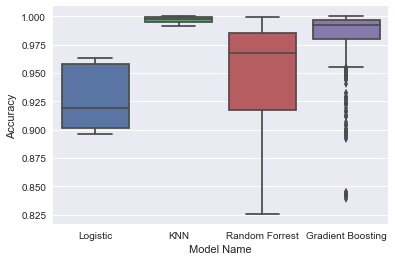

In [96]:
ax = sns.boxplot(x="Model Name", y="Accuracy", data=class_stats)

###### From all of the accuracies in the above boxplots we saw that KNN is the clear winner in terms of accuracy score. It had the smallest range that was centered the closest to 100%. Gradient boosting also has many values with high accuracy but the second widest range in performance after Random Forest. However, we also saw that KNN was least affected by any prameter changes, whereas Random Forest and Gradient Boosting had great variance based off of how parameters were changed and in the best case could only hit accuracies near KNN.

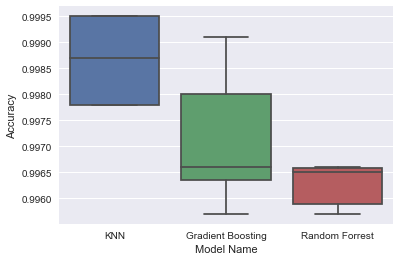

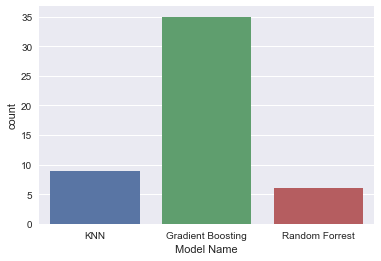

In [99]:
temp_class = class_stats.loc[(class_stats['CV'] == 'avg')].sort_values(by=['Accuracy'], ascending=False).head(50)
ax = sns.boxplot(x="Model Name", y="Accuracy", data=temp_class)
plt.show()
ax = sns.countplot(x="Model Name", data=temp_class)

###### To further understand this, we looked at only the top 50 accuracies and we saw that logistic regression falls off the chart since it had 0 values in the top 50.  Accuracy-wise, we still see KNN as the front runner with Gradient Boosting in close second reaching high accuracies in many cases and wtih Random Forest falling into last place overall in terms of count and overall performance.  We also noted that Gradient Boosting has the most in the top 50 (~35) however this may be caused by more parameters that need to be tested when compared to KNN

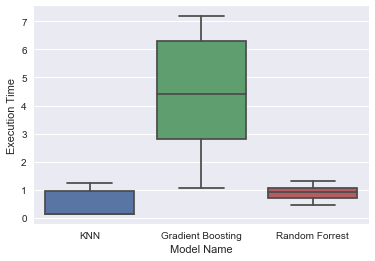

In [100]:
ax = sns.boxplot(x="Model Name", y="Execution Time", data=temp_class)

###### Finally, we looked at the execution time for our top 50 and saw that both KNN and Random Forest usually ran in less than 1 second while Gradient Boosting usually took much longer: on an average four to five seconds.  The accuracy over execution time would need to be considered depending on any production requirements for these models but in this case KNN clearly looks like the overall winner.

In [107]:
reg_stats.loc[(reg_stats['CV'] == 'avg')].sort_values(by=['MSE'], ascending=True).head(10)

,Type,Model Name,Paramaters,CV,Execution Time,MAE,MSE,Model
2639,regression,Extra Tree,estimators=100 max_depht=10 max_features=None,avg,0.6636,0.0128,0.0024,None
2606,regression,Extra Tree,estimators=100 max_depht=10 max_features=auto,avg,0.6671,0.0128,0.0024,None
2419,regression,Extra Tree,estimators=80 max_depht=10 max_features=None,avg,0.5830,0.0127,0.0024,None
2386,regression,Extra Tree,estimators=80 max_depht=10 max_features=auto,avg,0.5767,0.0127,0.0024,None
2199,regression,Extra Tree,estimators=60 max_depht=10 max_features=None,avg,0.4430,0.0127,0.0024,None
2166,regression,Extra Tree,estimators=60 max_depht=10 max_features=auto,avg,0.4679,0.0127,0.0024,None
1979,regression,Extra Tree,estimators=40 max_depht=10 max_features=None,avg,0.3328,0.0126,0.0024,None
1946,regression,Extra Tree,estimators=40 max_depht=10 max_features=auto,avg,0.3340,0.0126,0.0024,None
1759,regression,Extra Tree,estimators=20 max_depht=10 max_features=None,avg,0.2944,0.0126,0.0026,None
1726,regression,Extra Tree,estimators=20 max_depht=10 max_features=auto,avg,0.3144,0.0126,0.0026,None


###### First, we looked at the top 10 regression models by MSE similarly to how we looked at accuracy for our classification models.  Here we saw that "Extra Tree" takes every slot in our top 10 and that the top 5 have the same MSE value

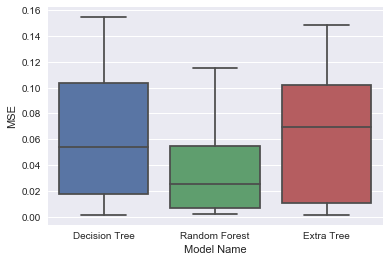

In [104]:
ax = sns.boxplot(x="Model Name", y="MSE", data=reg_stats)

######  Here we noticed that on average Random Forest performs better and has less fluctuation based on any parameter changes.  However, we know from the above output that this will change as we look at only higher performers

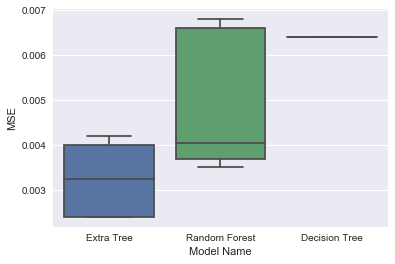

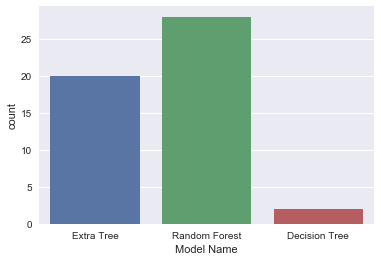

In [108]:
temp_class = reg_stats.loc[(reg_stats['CV'] == 'avg')].sort_values(by=['MSE'], ascending=True).head(50)
ax = sns.boxplot(x="Model Name", y="MSE", data=temp_class)
plt.show()
ax = sns.countplot(x="Model Name", data=temp_class)

###### We noticed that "Decision Tree" barely made the cut, only having about 2-3 in the top 50 and having expectedly poorer performance when compared to the average "Extra Tree" and "Random Forest" model.  We also saw a large number of "Random Forest" models present which further drives home the point that the models perform well and had less variance compared to the other model types.

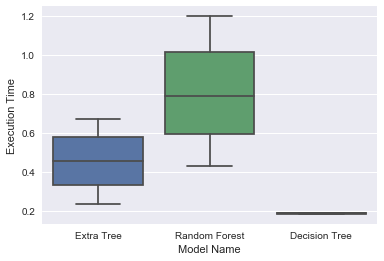

In [109]:
ax = sns.boxplot(x="Model Name", y="Execution Time", data=temp_class)

######  Finally, we looked at execution time for the top 50 regression models and found that while "Decision Tree" barely made the cut off for the top 50, it is by far the fastest executing of the three.   Here, "Extra Trees" both out performed "Random Forest" in the arena of execution time and MSE.  For this case, "Extra tree" is the best all around model.

# Modeling and Evaluation 5

Discuss the advantages of each model for each classification task, if any. If
there are not advantages, explain why. Is any model better than another? Is the
difference significant with 95% confidence? Use proper statistical comparison methods.
You must use statistical comparison techniques—be sure they are appropriate for your
chosen method of validation as discussed in unit 7 of the course.

###### Logistic Regression
- Classic method that is well established and thus well accepted in industry
- Can be strong against muli-collinearity when tested with both L1 and L2 penalties to identify (however this data set should not have this issue
- Is very probabilistic in nature
- generally low variance

###### KNN
- Does not require/make any assumptions about the data or normality of its distribution
- Due to the simplicity of the algorithm it can be very efficient in execution time (as noted in this project)

###### Random Forest
- Has less variance compared to other trees since it compares many trees
- Is much stronger to over fitting than basic decision trees 
- Is generally strong to muli-collinearity however this might skew feature importance and thus should still be handled before training

###### Gradient Boosting
- Sequentially builds trees which makes it easier to interpret when compared to random forest
- Can preform better than Random Forest but hyper parameters can be sensitive when adjusting.

###### Decision Tree
- Very easy to interpret visually
- Very fast to train
- Easily handle categorical features

###### Extra Trees
- Similar to Random Forest in performance generally
- Always use random split over a calculated split like Random Forest uses. 

In [200]:
def make_ci(metric, df, model_name, model_para):
    alpha = 0.95
    stats = list()
    for i in range(1,10,1):
        score = df.loc[(df['CV'] == i) & (df['Model Name'] == model_name) & (df['Paramaters'] == model_para)][metric].values
        stats.append(score)        
    acc = row[metric]
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(stats, p))
    name = metric + ' in ' + str(model_name) + ' ' + str(model_para)
    runtime = round(df.loc[(df['Model Name'] == model_name) & (df['Paramaters'] == model_para)]['Execution Time'].mean(),4)
#    print(name)
    print('%.1f CI for %s %0.4f and %0.4f with an average runtime of %0.4f' % (alpha*100, name, lower, upper, runtime))

######  The above code generates confidence intravels for whatever given metric across the CV splits for a given model

In [201]:
test_models = class_stats.loc[class_stats.groupby(['Type','Model Name'])['Accuracy'].idxmax(), :]
for i, row in test_models.iterrows():
    make_ci("Accuracy",class_stats, row['Model Name'], row['Paramaters'])

95.0 CI for Accuracy in Gradient Boosting estimators=60 max_depht=4 max_features=auto 0.9953 and 0.9996 with an average runtime of 3.3706
95.0 CI for Accuracy in KNN Neighbors=1 algorithm=ball_tree 0.9980 and 1.0000 with an average runtime of 0.1456
95.0 CI for Accuracy in Logistic L1 C=1.0 fit_intercept=True 0.9575 and 0.9615 with an average runtime of 1.5609
95.0 CI for Accuracy in Random Forrest estimators=60 max_depht=10 max_features=None 0.9930 and 0.9990 with an average runtime of 0.8580


###### For the classification models we picked only the best performing model of each time.  Here we see only KNN has 100% in its CI while Random Forest and Gradient Boost both have 99.6% in their upper bounds.  Only Logistic regression falls short of this with a  96% on its upper bound.   None of these preform poorly as each is above 95%.  After taking into account average runtime KNN and Random Forest look more appealing as they both run in <1 second with KNN being the fastest with the highest accuracy.  However with such high accuracies and low run times I would not call any of these models bad

In [204]:
test_models = reg_stats.loc[reg_stats.groupby(['Type','Model Name'])['MSE'].idxmin(), :]
for i, row in test_models.iterrows():
    make_ci("MSE",reg_stats, row['Model Name'], row['Paramaters'])

95.0 CI for MSE in Decision Tree splitter=best max_depht=8 max_features=auto 0.0021 and 0.0104 with an average runtime of 0.1822
95.0 CI for MSE in Extra Tree estimators=100 max_depht=10 max_features=auto 0.0014 and 0.0033 with an average runtime of 0.6671
95.0 CI for MSE in Random Forest estimators=100 max_depht=10 max_features=auto 0.0024 and 0.0057 with an average runtime of 1.1974


###### For the Regression models we also only looked at the top parameter models.  Seeing each with a < 0.01 score in lower bounds and only reaching 0.01 on the upper bound on Decision Tree it is hard to call any of these models poor performers.  When we take execution time into account we see Extra Tree begin to emerge as it runs in  <1 second in run time and has the best lower and upper bounds.  Again none of these models are bad performers and should not be discounted for possible production deployment.

# Modeling and Evaluation 6

Which attributes from your analysis are most important? Use proper
methods discussed in class to evaluate the importance of different attributes. Discuss
the results and hypothesize about why certain attributes are more important than others
for a given classification task.

In [209]:
class_stats.loc[class_stats.groupby(['Type','Model Name'])['Accuracy'].idxmax(), :]

,Type,Model Name,Paramaters,CV,Accuracy,Execution Time,True Positive,False Positive,False Negative,True Negative,Precision,Recall,Model
2198,classification,Gradient Boosting,estimators=60 max_depht=4 max_features=auto,10,1.000000,3.4319,3882,0,0,984,1.000000,1.000000,([DecisionTreeRegressor(criterion='friedman_ms...
441,classification,KNN,Neighbors=1 algorithm=ball_tree,2,1.000000,0.1461,3882,0,0,984,1.000000,1.000000,"KNeighborsClassifier(algorithm='ball_tree', le..."
405,classification,Logistic,L1 C=1.0 fit_intercept=True,10,0.963420,1.5773,3784,98,80,904,0.974755,0.979296,"LogisticRegression(C=1.0, class_weight=None, d..."
1260,classification,Random Forrest,estimators=60 max_depht=10 max_features=None,7,0.999178,0.7887,3882,0,4,980,1.000000,0.998971,"(DecisionTreeClassifier(class_weight=None, cri..."


###### We wish to get feature importance and luckily for us Random Forest provides a method for this.  However instead of just taking from from some unknown Random Forest we will get the parameters for our best running model from above and use the same for this model

In [222]:
rf_clf =RandomForestClassifier(max_depth=10, n_estimators=60, max_features=None, n_jobs=-1, random_state=101)

X = df_foo
y = df['sat_above_average'].values #this is the subset for classification
rf_clf.fit(X, y)

feature_importances = pd.DataFrame(rf_clf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
lea_salary_expense_pct,0.405863
lea_federal_perpupil_num,0.252237
lea_ap_pct_3_or_above,0.093113
unit_code,0.052215
lea_sat_participation_pct,0.031047
0-3 Years_LEA_Exp_Pct_Prin,0.019070
lea_services_expense_pct,0.018776
lea_instruct_equip_exp_pct,0.015680
lea_local_perpupil_num,0.015528
10+ Years_LEA_Exp_Pct_Prin,0.012181


###### A few of the top 20 stand out as most obvious 
- lea_salary_expense_pct - The more money a school gives to the teachers the better quality teaches you get and thus more prepared students
- lea_federal_perpupil_num - The more money the government gives to the school the more likely they can get good teachers and materials
- lea_sat_participation_pct - The number of students take the test usually is associated with the school pushing and preping
- lea_ap_pct_3_or_above	- The more students that participate in AP courses the better they will do since most AP courses are at higher levels than the SAT
- lea_ap_participation_pct	- Much like the SAT participation the more a school focuses on AP classes the more prepared in general the students will be

In [216]:
reg_stats.loc[reg_stats.groupby(['Type','Model Name'])['MSE'].idxmin(), :]

,Type,Model Name,Paramaters,CV,Execution Time,MAE,MSE,Model
267,regression,Decision Tree,splitter=best max_depht=8 max_features=auto,4,0.1661,0.001989,0.001354,"DecisionTreeRegressor(criterion='mse', max_dep..."
2597,regression,Extra Tree,estimators=100 max_depht=10 max_features=auto,2,0.6556,0.010386,0.001328,"(ExtraTreeRegressor(criterion='mse', max_depth..."
1497,regression,Random Forest,estimators=100 max_depht=10 max_features=auto,2,1.2090,0.010004,0.002304,"(DecisionTreeRegressor(criterion='mse', max_de..."


In [253]:
rf_clf =RandomForestRegressor(max_depth=10, n_estimators=100, max_features='auto', n_jobs=-1, random_state=101)

X = df_foo
y = df['lea_sat_avg_score_num'].values #this is the subset for regression
rf_clf.fit(X, y)

feature_importances = pd.DataFrame(rf_clf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
lea_salary_expense_pct,0.348627
lea_federal_perpupil_num,0.202745
lea_ap_pct_3_or_above,0.169931
lea_sat_participation_pct,0.118545
lea_supplies_expense_pct,0.033748
MinorityFemalePct,0.020348
unit_code,0.017390
lea_local_perpupil_num,0.011599
lea_ap_participation_pct,0.011341
lea_state_perpupil_num,0.011049


###### Since both of our classification and regression problems are similar it is no surprise that we see most of the same values found here.  The only stand out is we now see MinorityFemalePct float toward the top.  This might be helpful since both Gender and Race have an effect on average SAT scores and now that we are predicting an actual score instead of classifying if they preform above the national average finer details like this matter more.
- lea_salary_expense_pct - The more money a school gives to the teachers the better quality teaches you get and thus more prepared students
- lea_federal_perpupil_num - The more money the government gives to the school the more likely they can get good teachers and materials
- lea_sat_participation_pct - The number of students take the test usually is associated with the school pushing and peeping
- lea_ap_pct_3_or_above	- The more students that participate in AP courses the better they will do since most AP courses are at higher levels than the SAT
- lea_ap_participation_pct	- Much like the SAT participation the more a school focuses on AP classes the more prepared in general the students will be

# Deployment

How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it for prediction)? How would you measure the model's value if it
was used by these parties? How would your deploy your model for interested parties?
What other data should be collected? How often would the model need to be updated,
etc.?

######  This model could be for interest for several organizations to its accuracy in predicting which attributes are most related to increased or above average SAT score.  For example, we could envision that school districts could leverage this model to:
1.    Target teachers with a specific range of experience and education level
2.    How and where to allocate funds to most effectively boost SAT scores.
3.    Identify which social organization to partner with to offer after-school programs the may result in better performance.

###### Additionally, this model could be monetized by business trying to setup tutoring center by identifying which districts have below and more importantly are predicted to have below average SAT scores.

###### As for a deployment method the most financially savvy method is via a web API since we as the user consumes the model we still get to see when they consume and what data they send in for us to generate a prediction off off.  It is also easier to tie into third party applications and include a feedback loop to understand when/if our model is off for future retraining

# Exceptional Work

You have free reign to provide additional analyses.

One idea: grid search parameters in a parallelized fashion and visualize the
performances across attributes. Which parameters are most significant for making a
good model for each classification algorithm?

##### Model evaluation 3
###### For out exceptional work we focused on using models we haven't had much exposure to in class.  For that we stayed with tree based algorithms suck as Random Forest and Extra Trees.  We also tested Gradient Boosting.  For each of our models we fictionalized the running and storing of our models along with their performance metrics

###### Since we already had our model runs in a function it allowed us to play with a high level of parameter tweaking ending with over ~500 separate models and ~5000 models created when you count the CV runs.

###### The storing of our data made it easy to regenerate any model like we used in model evaluation 6 for creating the list of feature importance. 

##### Model evaluation 5
###### Again we  fictionalized   our methods so we can quickly and easily rerun the CI test with any test statistic.

#### The overall idea of fictionalizing the code was so that this ipython notebook could easily be pushed to a standard .py file of only the functions that could then be called in some standard loops and be treated as a one stop first go for young data scientists to see performance across a wide range of models with only the data cleaning task left to them.  So for the deployment task the script itself could be considered for deployment and not just the most appropriate model